In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, palette="husl")

In [2]:
df = pd.read_csv('Classification/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df['User ID'].value_counts() # no repeated users so user ID is of no importance

15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
           ..
15727467    1
15699619    1
15697574    1
15628972    1
15730688    1
Name: User ID, Length: 400, dtype: int64

no of non-purchased= 257 = 64.25 % of total values
no of purchased= 143 = 35.75 % of total values


C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


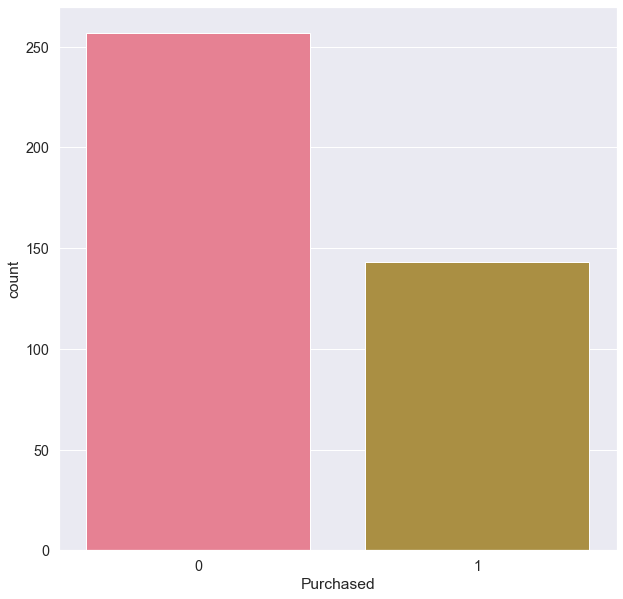

In [6]:
count = df['Purchased'].value_counts()

not_purchased_perc = 100* count.values[0]/len(df)
purchased_perc = 100*count.values[1]/len(df)
print(f'no of non-purchased= {count.values[0]} = {not_purchased_perc} % of total values')
print(f'no of purchased= {count.values[1]} = {purchased_perc} % of total values') # imabalanced classes

sns.countplot(df['Purchased'])

In [7]:
df = df.drop(['User ID'], axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


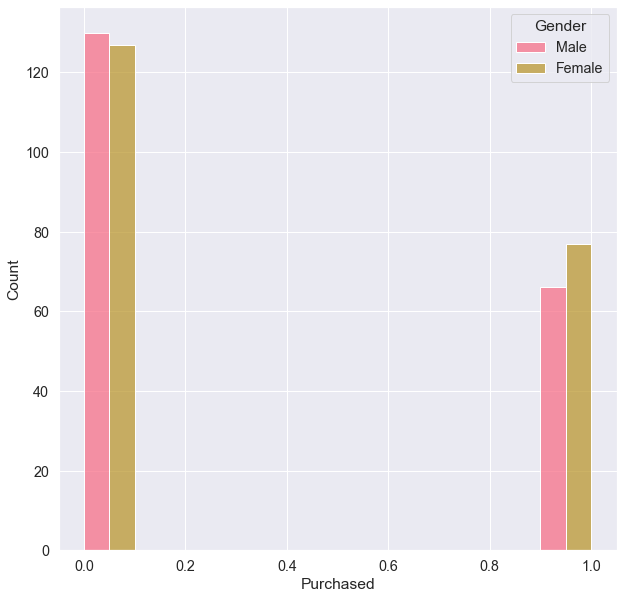

In [8]:
sns.histplot(data=df, x="Purchased", hue="Gender", multiple="dodge")

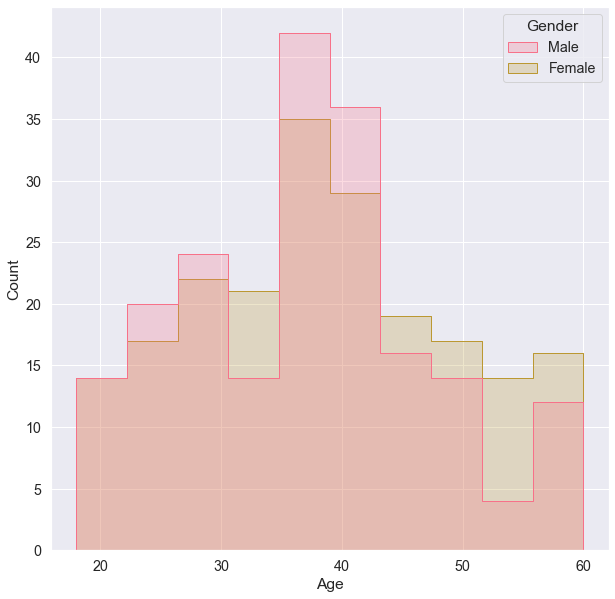

In [9]:
sns.histplot(data=df, x="Age", hue="Gender", element="step")

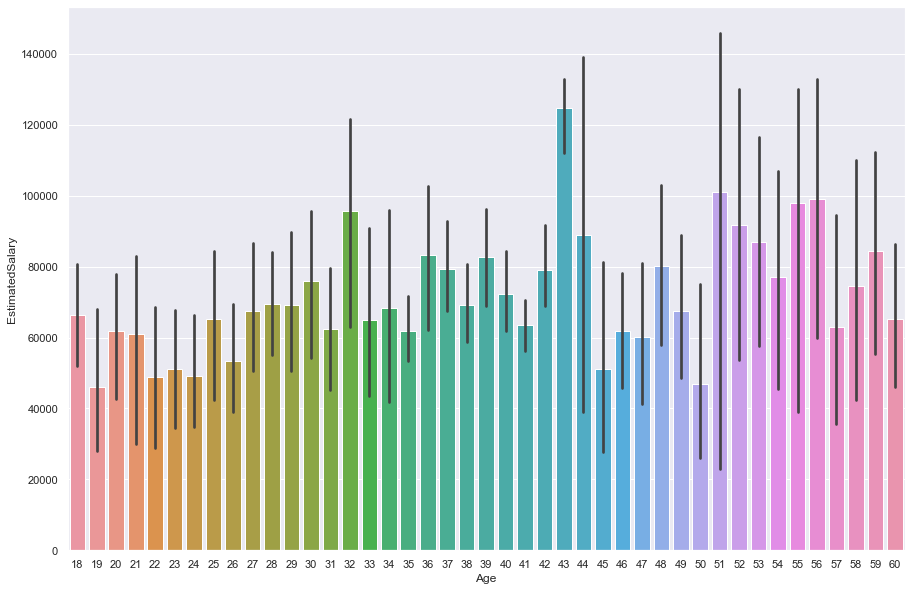

In [10]:
sns.set(rc={'figure.figsize': [15, 10]})
sns.barplot(data=df, x='Age', y='EstimatedSalary')

C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


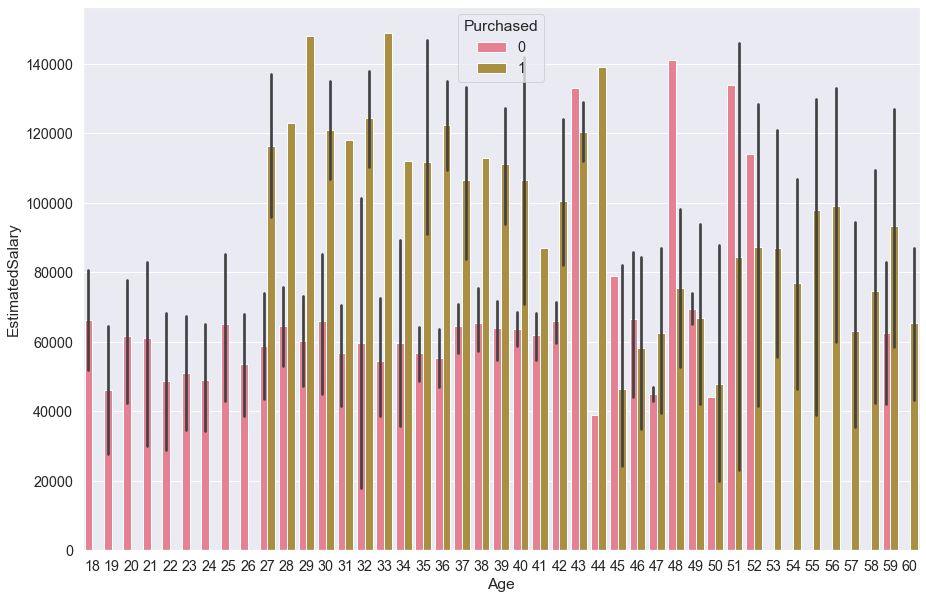

In [11]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, palette="husl")
sns.barplot(df['Age'], df['EstimatedSalary'], hue=df['Purchased'])

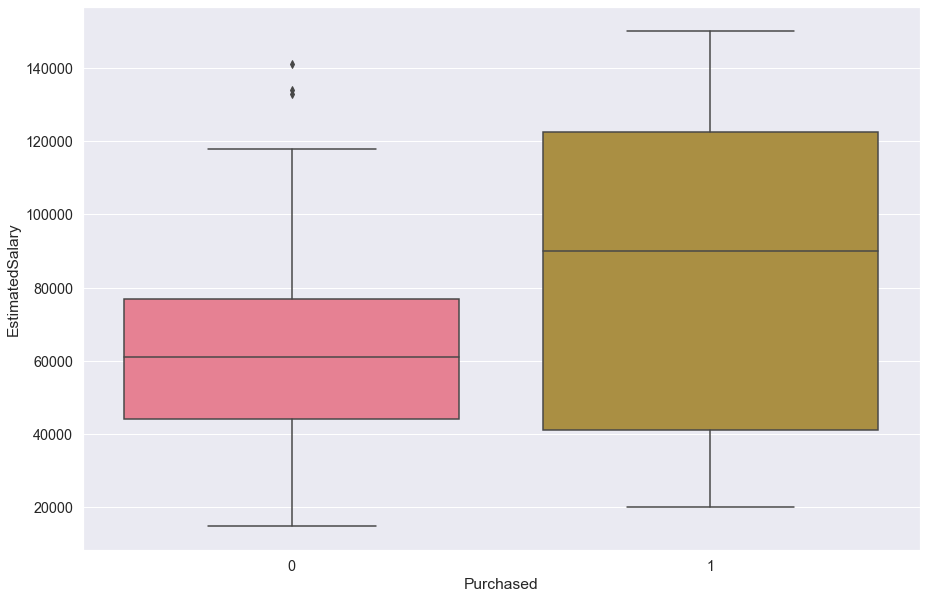

In [12]:
sns.boxplot(y= df['EstimatedSalary'], x=df['Purchased'])

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [14]:
def convert_gender(gender):
    return 0 if gender=='Male' else 1
gender_cat=list(map(convert_gender,df['Gender']))
df['GenderCategory']=gender_cat
df=df.drop(['Gender'], axis=1)
df.head()

,Age,EstimatedSalary,Purchased,GenderCategory
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


# Train test split:

In [15]:
X = df.drop(['Purchased'], axis=1)
Y = df['Purchased']
X.head()

,Age,EstimatedSalary,GenderCategory
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


In [16]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=100, shuffle=True)

Y_train = Y_train.values.reshape(Y_train.shape[0],1)
print(f'X_train dimensions: {X_train.shape}  -  Y_train dimensions: {Y_train.shape}')
Y_test = Y_test.values.reshape(Y_test.shape[0],1)
print(f'X_test dimensions: {X_test.shape}  -  Y_test dimensions: {Y_test.shape}')

X_train dimensions: (320, 3)  -  Y_train dimensions: (320, 1)
X_test dimensions: (80, 3)  -  Y_test dimensions: (80, 1)


# Feature scaling:

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Age']])
X_train['Age'] = scaler.transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])
X_train.head()

C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,EstimatedSalary,GenderCategory
190,0.142857,84000,0
46,0.166667,79000,0
50,0.142857,32000,1
377,0.571429,53000,1
121,0.452381,72000,0


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['EstimatedSalary']])
X_train['EstimatedSalary'] = scaler.transform(X_train[['EstimatedSalary']])
X_test['EstimatedSalary'] = scaler.transform(X_test[['EstimatedSalary']])
X_train.head()

C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,EstimatedSalary,GenderCategory
190,0.142857,0.388957,0
46,0.166667,0.245431,0
50,0.142857,-1.103720,1
377,0.571429,-0.500908,1
121,0.452381,0.044493,0


# model training:

## Logistic Regression:

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
y_logReg_pred = logReg.predict(X_test)

print(f'Confusion Matrix :\n {confusion_matrix(Y_test, y_logReg_pred)}')
print(f'Accuracy Score :\n {accuracy_score(Y_test, y_logReg_pred)}')
print(f'Classification Report :\n {classification_report(Y_test, y_logReg_pred)}')


Confusion Matrix :
 [[47  2]
 [12 19]]
Accuracy Score :
 0.825
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.96      0.87        49
           1       0.90      0.61      0.73        31

    accuracy                           0.82        80
   macro avg       0.85      0.79      0.80        80
weighted avg       0.84      0.82      0.82        80



C:\Users\Nada Abbas\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN:

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_knn_pred = knn.predict(X_test)

print(f'Confusion Matrix :\n {confusion_matrix(Y_test, y_knn_pred)}')
print(f'Accuracy Score :\n {accuracy_score(Y_test, y_knn_pred)}')
print(f'Classification Report :\n {classification_report(Y_test, y_knn_pred)}')


Confusion Matrix :
 [[46  3]
 [ 7 24]]
Accuracy Score :
 0.875
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        49
           1       0.89      0.77      0.83        31

    accuracy                           0.88        80
   macro avg       0.88      0.86      0.86        80
weighted avg       0.88      0.88      0.87        80



C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## SVM:

In [22]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train,Y_train)
y_SVM_pred = SVM.predict(X_test)

print(f'Confusion Matrix :\n {confusion_matrix(Y_test, y_SVM_pred)}')
print(f'Accuracy Score :\n {accuracy_score(Y_test, y_SVM_pred)}')
print(f'Classification Report :\n {classification_report(Y_test, y_SVM_pred)}')


Confusion Matrix :
 [[46  3]
 [ 5 26]]
Accuracy Score :
 0.9
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.90      0.84      0.87        31

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



C:\Users\Nada Abbas\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree:

In [23]:
from sklearn.tree import DecisionTreeClassifier

DecTree = DecisionTreeClassifier()
DecTree.fit(X_train,Y_train)
y_DecTree_pred = DecTree.predict(X_test)

print(f'Confusion Matrix :\n {confusion_matrix(Y_test, y_DecTree_pred)}')
print(f'Accuracy Score :\n {accuracy_score(Y_test, y_DecTree_pred)}')
print(f'Classification Report :\n {classification_report(Y_test, y_DecTree_pred)}')


Confusion Matrix :
 [[44  5]
 [ 9 22]]
Accuracy Score :
 0.825
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        49
           1       0.81      0.71      0.76        31

    accuracy                           0.82        80
   macro avg       0.82      0.80      0.81        80
weighted avg       0.82      0.82      0.82        80



## Random Forest:

In [24]:
from sklearn.ensemble import RandomForestClassifier

RandForest = RandomForestClassifier()
RandForest.fit(X_train,Y_train)
y_RandForest_pred = RandForest.predict(X_test)

print(f'Confusion Matrix :\n {confusion_matrix(Y_test, y_RandForest_pred)}')
print(f'Accuracy Score :\n {accuracy_score(Y_test, y_RandForest_pred)}')
print(f'Classification Report :\n {classification_report(Y_test, y_RandForest_pred)}')


C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Confusion Matrix :
 [[46  3]
 [ 7 24]]
Accuracy Score :
 0.875
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        49
           1       0.89      0.77      0.83        31

    accuracy                           0.88        80
   macro avg       0.88      0.86      0.86        80
weighted avg       0.88      0.88      0.87        80



## Naive Bayes:

In [25]:
from sklearn.preprocessing import MinMaxScaler  # cannot work on negative values generated by StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['EstimatedSalary']])
X_train['EstimatedSalary'] = scaler.transform(X_train[['EstimatedSalary']])
X_test['EstimatedSalary'] = scaler.transform(X_test[['EstimatedSalary']])
X_train.head()

C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Nada Abbas\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,EstimatedSalary,GenderCategory
190,0.142857,0.511111,0
46,0.166667,0.474074,0
50,0.142857,0.125926,1
377,0.571429,0.281481,1
121,0.452381,0.422222,0


In [26]:
from sklearn.naive_bayes import MultinomialNB  

NB = MultinomialNB()
NB.fit(X_train,Y_train)
y_NB_pred = knn.predict(X_test)

print(f'Confusion Matrix :\n {confusion_matrix(Y_test, y_NB_pred)}')
print(f'Accuracy Score :\n {accuracy_score(Y_test, y_NB_pred)}')
print(f'Classification Report :\n {classification_report(Y_test, y_NB_pred)}')


Confusion Matrix :
 [[43  6]
 [10 21]]
Accuracy Score :
 0.8
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        49
           1       0.78      0.68      0.72        31

    accuracy                           0.80        80
   macro avg       0.79      0.78      0.78        80
weighted avg       0.80      0.80      0.80        80



C:\Users\Nada Abbas\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Models Outputs:

In [51]:
print('Confusion Matricies   #   Accuracy Score')
print(f'Logistic Regression \n {confusion_matrix(Y_test, y_logReg_pred)}      -     {accuracy_score(Y_test, y_logReg_pred)} \n')
print(f'KNN \n {confusion_matrix(Y_test, y_knn_pred)}     -    {accuracy_score(Y_test, y_knn_pred)}\n')
print(f'SVM \n {confusion_matrix(Y_test, y_SVM_pred)}     -    {accuracy_score(Y_test, y_SVM_pred)} \n')
print(f'Decision Tree \n {confusion_matrix(Y_test, y_DecTree_pred)}    -    {accuracy_score(Y_test, y_DecTree_pred)}\n')
print(f'Random Forest \n {confusion_matrix(Y_test, y_RandForest_pred)}    -    {accuracy_score(Y_test, y_RandForest_pred)}\n')
print(f'Naive Bayes \n {confusion_matrix(Y_test, y_NB_pred)}    -    {accuracy_score(Y_test, y_NB_pred)}      \n')

Confusion Matricies   #   Accuracy Score
Logistic Regression 
 [[47  2]
 [12 19]]      -     0.825 

KNN 
 [[46  3]
 [ 7 24]]     -    0.875

SVM 
 [[46  3]
 [ 5 26]]     -    0.9 

Decision Tree 
 [[44  5]
 [ 9 22]]    -    0.825

Random Forest 
 [[46  3]
 [ 7 24]]    -    0.875

Naive Bayes 
 [[43  6]
 [10 21]]    -    0.8      



in this case it is important to correctly predict who will be most probable to purchase so the TP is the most important metric also the accuracy is important so accordingly I would be choosing the SVM model for prediction